# A first look at the data

## Introduction

In this section the paths to the data will de set such that they can be loaded. This will allow for explaining the data structure and do a few sanity checks. Finally follows some examples for how to perform simples plots of the raw data.

Import the required modules:

In [2]:
pip install "mne[hdf5]"

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install openneuro-py


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade mne-bids[full]

     |████████████████████████████████| 163 kB 633 kB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 762 kB/s eta 0:00:01
  Using cached pybv-0.7.5-py2.py3-none-any.whl (24 kB)
  Using cached EDFlib_Python-1.0.8-py3-none-any.whl (26 kB)
  Using cached eeglabio-0.0.2.post4-py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import os.path as op
import openneuro

import numpy as np
import mne
from mne_bids import BIDSPath, read_raw_bids # If you don't have mne_bids installed, comment this line.

## Loading the data

The MEGIN data are stored in the FIF format which is a binary format with embedded labels.

The first step is to set the path to the data as well as the files names. Note that this will dependent on where you have stored the dataset.


### File overview
The chapter relies on the file (embedded in the BIDS structure):
~~~
<BIDS_ROOT>/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_meg.fif
~~~

### Loading the BIDS data

<div class="alert alert-block alert-danger">
<b>Warning:<br />
    </b> Before proceeding with the tutorial, make sure that the download is complete. This step can take many minutes, depending on your internet connection speed.

In [10]:
# Follow these instruction if you already have download the data to a local directory
#/home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_task-dur_run-01_meg.fif
/home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/
bids_root = r'/home/sanjeev/Desktop/BIO/MEG/'
#dataset = 'sub-CA103_ses-1_task-dur_run-01_meg.fif';
# The folder just under bids_root is called sub-01
# Example for Windows
#bids_root = r'C:\Users\parkh\MEG Dropbox\Hyojin Park\FLUX'
# Example for MacOS
#bids_root = '/Users/o.jensen@bham.ac.uk/Python/FLUX/Data/ds004346/'

The next step is to prepare the data for reading. This requires creating the mne_bids.BIDSPath which point to the path of MNE-BIDS structure.

In [19]:
subject = 'CA103'
session = '1'
task = 'dur'  # name of the task
run = '01'  # we have two runs for this subject, let's look at run = 1
suffix = 'meg'

bids_path = BIDSPath(subject=subject, session=session,
task=task, run=run, suffix=suffix, root=bids_root)

There is a limit to the file size of the FIF files. If the MEG recordings exceed this limit, the MEGIN acquisition system automatically split the data in two or more FIF files. In those cases, by reading the first FIF file, MNE-Python will automatically read all the linked split files. In this example, the sample dataset was broken into 2 sub-files by the operator and they need to be read one by one.

We now created the BIDSPath object, let's read the first meg file:

In [21]:
print(bids_path)
data1 = mne.io.read_raw_fif('/home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_task-dur_run-01_meg.fif') 


/home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_task-dur_run-01_meg.fif
Opening raw data file /home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_task-dur_run-01_meg.fif...
    Read a total of 8 projection items:
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
    Range : 9000 ... 852999 =      9.000 ...   852.999 secs
Ready.


## Inspecting at the data

To get some basic information from the FIF file write:

In [22]:
print(data1)

<Raw | sub-CA103_ses-1_task-dur_run-01_meg.fif, 341 x 844000 (844.0 s), ~5.4 MB, data not loaded>


The 527 kB refers to the size of the data set. The 1457.0 s is the recording time. As the sampling rate was 1000 Hz, this results in 1457000 samples recorded in 343 channels. These channels include the MEG, EOG, triggers channels etc.

To get some additional information:

In [23]:
print(data1.info)

<Info | 23 non-empty values
 acq_pars: ACQactiveGround 1 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: EOG001, EOG002, ECG003, IASX+, IASX-, IASY+, IASY-, IASZ+, ...
 chs: 2 EOG, 1 ECG, 11 Internal Active Shielding data (Triux systems), 102 Magnetometers, 204 Gradiometers, 5 misc, 15 Stimulus, 1 System status channel information (Triux systems)
 custom_ref_applied: False
 description: TRIUX system at XXX. MPG Site XNAT Anonymization script v001. ...
 dev_head_t: MEG device -> head transform
 dig: 270 items (3 Cardinal, 4 HPI, 263 Extra)
 events: 1 item (list)
 experimenter: mne_anonymize
 file_id: 4 items (dict)
 gantry_angle: 68.0
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 3 items (dict)
 line_freq: 50.0
 lowpass: 330.0 Hz
 meas_date: 2000-01-01 00:00:00 UTC
 meas_id: 4 items (dict)
 nchan: 341
 proj_name: mne_anonymize
 projs: generated with autossp-1.2.0: off, generated with autossp-1.2.0: ...
 sfreq: 1000.0 Hz
 sub

This information shows important parameters of the dataset. For instance, the gantry was positioned at 68 degress (*gantry_angle*) and that the sampling frequency was 1000 Hz (*sfreq*). The data were lowpass filtered at 330.0 Hz (*lowpass*) and highpass filtered at 0.1 Hz (*highpass*) prior to the digital sampling. The *experimenter* is anonymized and the recording data is not meaningful as to comply with GDPR rules.


**Question 1:** What is the purpose of the 330 Hz lowpas-filter (hint: see Analog Filters for Data Conversion, Chapter 3; Smith et al., 1999)

**Question 2:** What is the purpose of 0.1 Hz highpass-filter?


The data object (*data1*) allows for a simple inspection of the data by calculating the spectra:

In [24]:
n_fft = 2000
data1PSD = data1.compute_psd(method="welch", fmin=1, fmax=60, picks="meg", n_fft=n_fft, n_overlap=int(n_fft/2))

Effective window size : 2.000 (s)


A standard Welch method is applied here. The data are divided into sections being 2 s long (2000 samples) with a 1 s overlap (1000 samples). This results in a 0.5 Hz resolution Prior to calculating the FFT of each section a Hamming taper is multiplied.

To plot the data write

Plotting power spectral density (dB=True).


/tmp/ipykernel_15592/3502906372.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  data1PSD.plot();
/home/sanjeev/.local/lib/python3.9/site-packages/mne/viz/utils.py:167: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


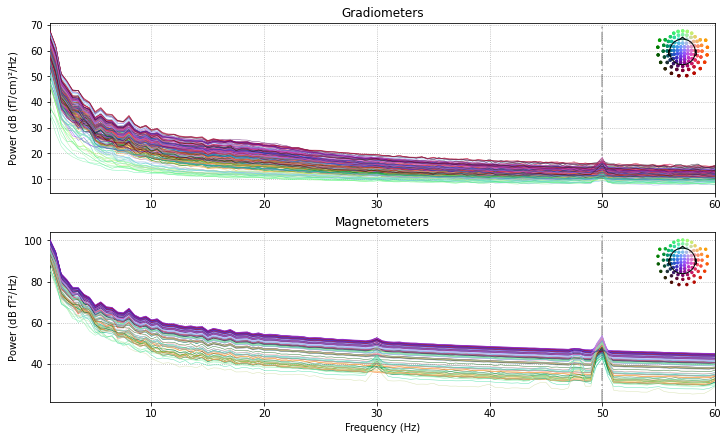

In [25]:
%matplotlib inline
data1PSD.plot();

Note the 10 Hz alpha activity in the gradiometers as well as the 50 Hz line noise. The frequency of the line noise is 50 Hz in European countries including Russia whereas it is 60 in South Korea as well as South and North America. In Japan it can be either 50 or 60 Hz depending on the region.

**Question 3:** Why is the line-noise 50 Hz larger for the magnetometers than the gradiometers?


To show the raw data use:

Using matplotlib as 2D backend.


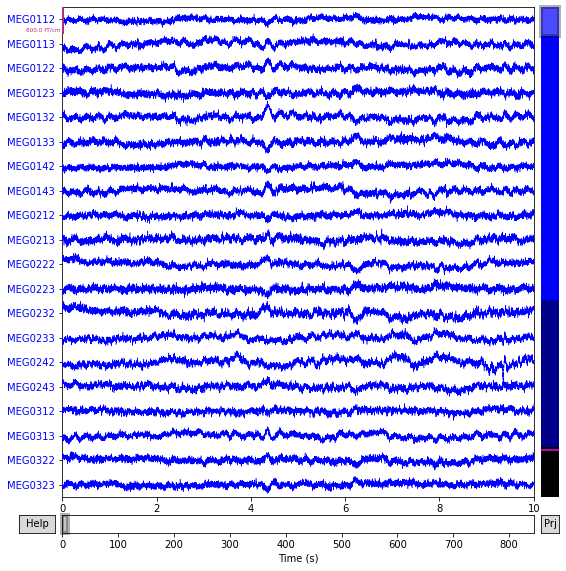

In [26]:
%matplotlib inline
data1.plot(duration=10, title='Raw');

In [27]:
pip install PyQt5

Note: you may need to restart the kernel to use updated packages.


To enable the interactive functions of the plotting tool:

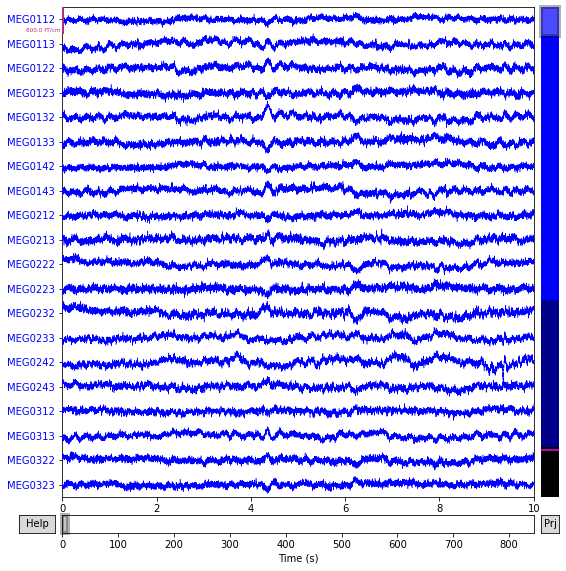

In [28]:
%matplotlib qt
data1.plot(duration=10, title='Raw')


This will open the plot in a new window. Use the arrow keys to move over channels and time. Click on the help button for more information.

**Question 3:** Scroll through the MEG data and identify the following artifacts (include figures in the response):

- Eye-blink
- A muscle contraction (characterized by high-frequency activity
- The cardiac artifact



## Preregistration and publication

Preregistration: report the sampling frequency and the properties of the anti-aliasing lowpass filter. Also report the peripheral data to be recorded (e.g. the EOG and ECG)

Publication, example:

"The ongoing MEG data were recorded using the TRIUX system from MEGIN. This system consists of 102 magnetometers and 204 planar gradiometers. Each of the 102 sensor locations has one magnetometer and a set of two orthogonal gradiometers. The horizontal and vertical EOG data, as well as the ECG, were also collected alongside the MEG data. All the data were sampled at 1000 Hz and stored for offline analysis. Prior to sampling, a lowpass filter at ~330 Hz was applied. To record the horizontal EOG, a pair of electrodes were attached approximately 2.5 cm away from the outer canthus of each eye. To record the vertical EOG, a pair of electrodes were placed above and below the right eye in line with the pupil. The ECG was recorded from a pair of electrodes placed on the left and right collarbone. In addition, four head position indicator coils (HPIs) were placed behind the left and right ear, as well as on the left and right forehead just below the hairline. The positions of the HPIs, the nasion, the left and right preauricular points, as well as the surface points of the scalp, were digitized using a Polhemus device."


## References
Smith, W.S. (1997) The Scientist and Engineer's Guide to Digital Signal Processing. California Technical Publishing. ISBN 0-9660176-3-3 [Online version](http://www.dspguide.com/)

# Applying the MaxFilter after identifying bad sensors

# Introduction

The aim of this section is to demonstrate the application of the 'Maxwell filtering' alse referred to as signal-space separation (SSS). The implementation termed MaxFilter serves to reduce artifacts from both environmental sources and sensor noise. The procedure also performs some fine-tuning and reduces the cross-talk between co-located sensors. Prior to applying the MaxFilter algorithm it is advisable to remove 'bad' sensors, i.e. sensors that are flat or have excessive artifacts. If this is not done, it might result in the artifacts from faulty sensors being distributed to other sensors.

Specifically, the SSS is a technique derived from the physics of electromagnetism defined by the Maxwell equations (Taulu and Kajola 2005; Taulu and Simola 2006). The algorithm separates the measured signal into components attributable to sources respectively inside and outside the MEG sensor array. As the internal and external components are linearly independent, it is possible to suppress the contribution from the external components and thus reduce environmental noise sources. The procedure also omits the higher-order components dominated by noise.

# Preparation

First load the relevant Python modules:

In [29]:
import os.path as op
import os
import sys
import numpy as np

import mne
from mne_bids import BIDSPath, read_raw_bids
import matplotlib.pyplot as plt
import scipy

## File overview
The chapter relies on the input files:

~~~
<BIDS_ROOT>/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_meg.fif
<BIDS_ROOT>/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-02_meg.fif
<BIDS_ROOT>/sub-01/ses-01/meg/sub-01_ses-01_acq-calibration_meg.dat
<BIDS_ROOT>/sub-01/ses-01/meg/sub-01_ses-01_acq-crosstalk_meg.fif
~~~
and generates the output files
~~~
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_raw_sss.fif
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-02_raw_sss.fif
~~~


Define path to the local data and then define the file names:

In [32]:
subject = '01'
session = '01'
task = 'dur'
run = '01'

bids_root = r'/home/sanjeev/Desktop/BIO/MEG' # path to where you downloaded data
#bids_root = '/Users/o.jensen@bham.ac.uk/Python/FLUX/Data/ds004346/'

bids_path = BIDSPath(subject=subject, session=session,
            task=task, run=run, suffix='meg', extension='.fif', root=bids_root)

#deriv_root = r'C:\Users\parkh\MEG Dropbox\Hyojin Park\FLUX\derivatives\Preprocessing' # path to the MaxFilter derivatives folder, with similar BIDS structure as raw data
deriv_root = r'/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing'

deriv_path = BIDSPath(subject=subject, session=session, datatype='meg',
            task=task, run=run, suffix='meg', root=deriv_root).mkdir()

deriv_fname = bids_path.basename.replace('meg', 'raw_sss') # output filename
deriv_file_1 = op.join(deriv_path.directory, deriv_fname)
deriv_file_2 = deriv_file_1.replace('run-01', 'run-02')

Now define the calibration and cross-talk files. Thes files contains site-specific information relating to sensor orientation and calibration. If you cannot find them, please ask your local experts. The crosstalk compensation file containes parameters used to reduce interference between co-located magnetometer and paired gradiometer sensor units. The calibration file contains information specfic to the local static magnetic fields and gradients. Note that the calibration file will be specific to the position of the MEG system (the angle of the gantry). In this case the gantry angle was 68 degrees (a 'A first look at the data').

In [34]:
crosstalk_file = "/home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_acq-crosstalk_meg.fif"
calibration_file = "/home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_acq-calibration_meg.dat"
print(crosstalk_file)
print(calibration_file)


/home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_acq-crosstalk_meg.fif
/home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_acq-calibration_meg.dat


Now read the raw data

In [35]:
data1 = mne.io.read_raw_fif('/home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_task-dur_run-01_meg.fif') 


Opening raw data file /home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_task-dur_run-01_meg.fif...
    Read a total of 8 projection items:
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
    Range : 9000 ... 852999 =      9.000 ...   852.999 secs
Ready.


### Idenfity the faulty sensors
The following scripts automatically identify the faulty sensors:

data1.info['bads'] = []
data1_check = data1.copy()
auto_noisy_chs, auto_flat_chs, auto_scores = mne.preprocessing.find_bad_channels_maxwell(
    data1_check,
    cross_talk=crosstalk_file,
    calibration=calibration_file,
    return_scores=True,
    verbose=True)

In [43]:
print('noisy =', auto_noisy_chs)
print('flat =', auto_flat_chs)

noisy = ['MEG2433']
flat = []


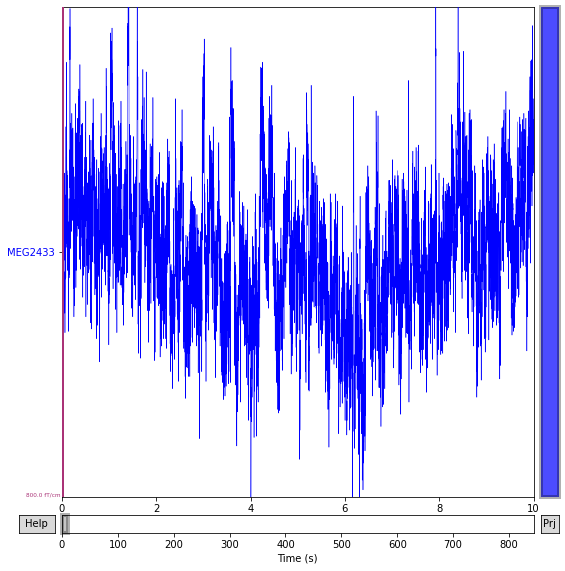

In [38]:
data_tmp = data1.copy()
data_tmp.pick(["MEG2433"])
data_tmp.plot(proj = False)

Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for grad. Disabling interactivity.


/tmp/ipykernel_15592/2533648780.py:3: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  data_tmpPSD.plot()


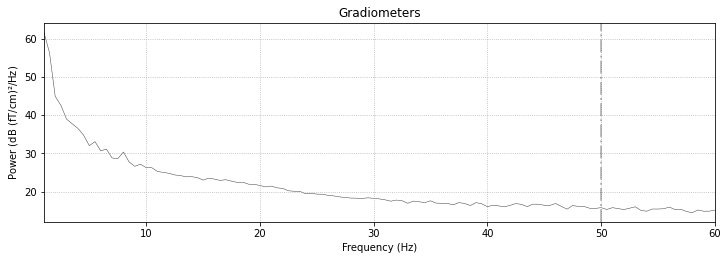

In [40]:
n_fft = 2000
data_tmpPSD = data_tmp.compute_psd(method="welch", fmin=1, fmax=60,  n_fft=n_fft, n_overlap=int(n_fft/2))
data_tmpPSD.plot()

In [41]:
data1.info['bads'].extend(auto_noisy_chs + auto_flat_chs)
print('bads =', data1.info['bads'])

bads = ['MEG2433']


In [42]:
data1.fix_mag_coil_types()

102 of 102 magnetometer types replaced with T3.


<Raw | sub-CA103_ses-1_task-dur_run-01_meg.fif, 341 x 844000 (844.0 s), ~5.4 MB, data not loaded>

In [44]:
data1_sss = mne.preprocessing.maxwell_filter(
    data1,
    cross_talk=crosstalk_file,
    calibration=calibration_file,
    verbose=True)

Maxwell filtering raw data
    Bad MEG channels being reconstructed: ['MEG2433']
    Processing 204 gradiometers and 102 magnetometers
    Using fine calibration sub-CA103_ses-1_acq-calibration_meg.dat
        Adjusting non-orthogonal EX and EY
        Adjusted coil positions by (μ ± σ): 0.3° ± 0.3° (max: 1.6°)
    Automatic origin fit: head of radius 86.1 mm
    Using origin 0.4, -0.3, 54.1 mm in the head frame
        Using 88/95 harmonic components for    0.000  (73/80 in, 15/15 out)
    Loading raw data from disk
    Processing 84 data chunks
[done]


Channels marked as bad:
none
Channels marked as bad:
none
Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_15592/3610525631.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  data1.compute_psd(fmax=60, n_fft=1000).plot();
/home/sanjeev/.local/lib/python3.9/site-packages/mne/viz/utils.py:167: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


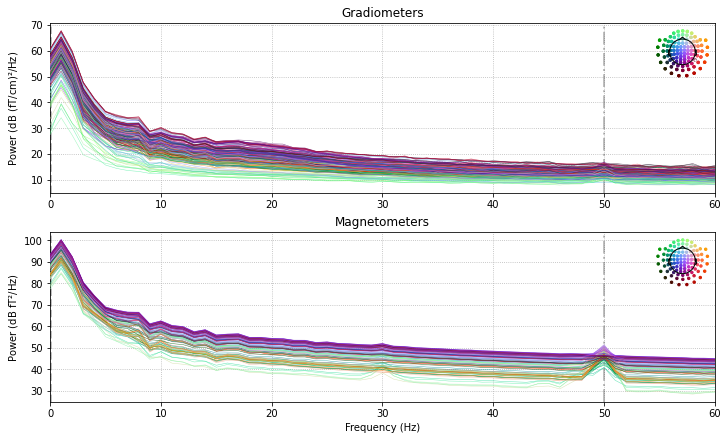

In [45]:
%matplotlib inline
data1.compute_psd(fmax=60, n_fft=1000).plot();

Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_15592/3509697005.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  data1_sss.compute_psd(fmax=60, n_fft=1000).plot();
/home/sanjeev/.local/lib/python3.9/site-packages/mne/viz/utils.py:167: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


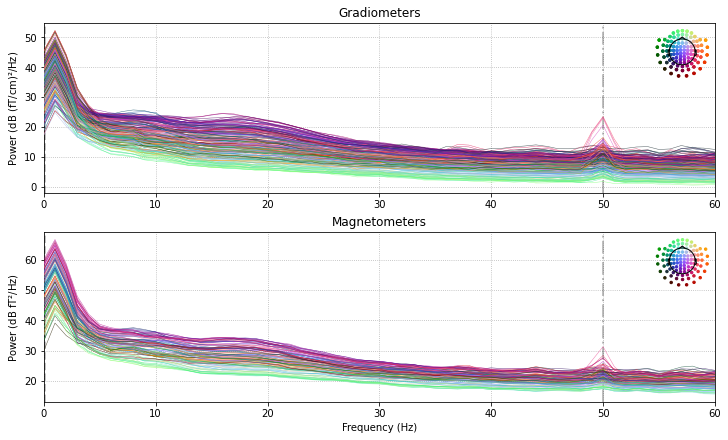

In [46]:
%matplotlib inline
data1_sss.compute_psd(fmax=60, n_fft=1000).plot();

In [47]:
data1_sss.save(deriv_file_1, overwrite=True) 

Writing /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_raw_sss.fif
Closing /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_raw_sss.fif
[done]


In [56]:

data2 = mne.io.read_raw_fif('/home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_task-dur_run-02_meg.fif') 

data2.info['bads'].extend(auto_noisy_chs + auto_flat_chs)
data2.fix_mag_coil_types()
data2_sss = mne.preprocessing.maxwell_filter(data2,
                                             cross_talk=crosstalk_file,                                          
                                             calibration=calibration_file,
                                             verbose=True)
# data2_sss.info['subject_info']['weight'] = None  
# data2_sss.info['subject_info']['height'] = None
data2_sss.save(deriv_file_2, overwrite=True)


Opening raw data file /home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_task-dur_run-02_meg.fif...
    Read a total of 8 projection items:
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
    Range : 10000 ... 892999 =     10.000 ...   892.999 secs
Ready.
102 of 102 magnetometer types replaced with T3.
Maxwell filtering raw data
    Bad MEG channels being reconstructed: ['MEG2433']
    Processing 204 gradiometers and 102 magnetometers
    Using fine calibration sub-CA103_ses-1_acq-calibration_meg.dat
        Adjusting non-orthogonal EX and EY
        Adjusted coil positions by (μ ± σ): 0.3° ± 0.3° (max

In [60]:
#run 3
deriv_file_3 = deriv_file_2.replace('run-02', 'run-03')
data3 = mne.io.read_raw_fif('/home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_task-dur_run-03_meg.fif') 

data3.info['bads'].extend(auto_noisy_chs + auto_flat_chs)
data3.fix_mag_coil_types()
data3_sss = mne.preprocessing.maxwell_filter(data3,
                                             cross_talk=crosstalk_file,                                          
                                             calibration=calibration_file,
                                     
                                             verbose=True)
# data3_sss.info['subject_info']['weight'] = None  
# data3_sss.info['subject_info']['height'] = None
data3_sss.save(deriv_file_3, overwrite=True)


Opening raw data file /home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_task-dur_run-03_meg.fif...
    Read a total of 8 projection items:
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
    Range : 9000 ... 825999 =      9.000 ...   825.999 secs
Ready.
102 of 102 magnetometer types replaced with T3.
Maxwell filtering raw data
    Bad MEG channels being reconstructed: ['MEG2433']
    Processing 204 gradiometers and 102 magnetometers
    Using fine calibration sub-CA103_ses-1_acq-calibration_meg.dat
        Adjusting non-orthogonal EX and EY
        Adjusted coil positions by (μ ± σ): 0.3° ± 0.3° (max:

In [61]:
#run 4
deriv_file_4 = deriv_file_3.replace('run-03', 'run-04')
data4 = mne.io.read_raw_fif('/home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_task-dur_run-04_meg.fif') 

data4.info['bads'].extend(auto_noisy_chs + auto_flat_chs)
data4.fix_mag_coil_types()
data4_sss = mne.preprocessing.maxwell_filter(data4,
                                             cross_talk=crosstalk_file,                                          
                                             calibration=calibration_file,
                                     
                                             verbose=True)
# data3_sss.info['subject_info']['weight'] = None  
# data3_sss.info['subject_info']['height'] = None
data4_sss.save(deriv_file_4, overwrite=True)


Opening raw data file /home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_task-dur_run-04_meg.fif...
    Read a total of 8 projection items:
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
    Range : 10000 ... 828999 =     10.000 ...   828.999 secs
Ready.
102 of 102 magnetometer types replaced with T3.
Maxwell filtering raw data
    Bad MEG channels being reconstructed: ['MEG2433']
    Processing 204 gradiometers and 102 magnetometers
    Using fine calibration sub-CA103_ses-1_acq-calibration_meg.dat
        Adjusting non-orthogonal EX and EY
        Adjusted coil positions by (μ ± σ): 0.3° ± 0.3° (max

In [62]:
#run 5
deriv_file_5 = deriv_file_4.replace('run-04', 'run-05')
data5 = mne.io.read_raw_fif('/home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_task-dur_run-05_meg.fif') 

data5.info['bads'].extend(auto_noisy_chs + auto_flat_chs)
data5.fix_mag_coil_types()
data5_sss = mne.preprocessing.maxwell_filter(data5,
                                             cross_talk=crosstalk_file,                                          
                                             calibration=calibration_file,
                                     
                                             verbose=True)
# data3_sss.info['subject_info']['weight'] = None  
# data3_sss.info['subject_info']['height'] = None
data5_sss.save(deriv_file_5, overwrite=True)


Opening raw data file /home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_task-dur_run-05_meg.fif...
    Read a total of 8 projection items:
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
    Range : 37000 ... 842999 =     37.000 ...   842.999 secs
Ready.
102 of 102 magnetometer types replaced with T3.
Maxwell filtering raw data
    Bad MEG channels being reconstructed: ['MEG2433']
    Processing 204 gradiometers and 102 magnetometers
    Using fine calibration sub-CA103_ses-1_acq-calibration_meg.dat
        Adjusting non-orthogonal EX and EY
        Adjusted coil positions by (μ ± σ): 0.3° ± 0.3° (max

# Annotation of artifacts

## Introduction

We will show here how artifacts can be identified and then annotated. The annotations will be represented in the FIF data file. Sections or trials will not be rejected at this stage; rather the annotations may be used later. For instance, they can be used to reject trials with eyeblinks or muscle contractions depending on their relevance for the analysis.  

## Preparation

Import the relevant modules: 

### File overview
The chapter relies on the input file (embedded in the BIDS structure):
~~~
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_raw_sss.fif
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-02_raw_sss.fif
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-03_raw_sss.fif
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-04_raw_sss.fif
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-05_raw_sss.fif

~~~
and generates the output files
~~~
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_ann.csv
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-02_ann.csv
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-03_ann.csv
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-04_ann.csv
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-05_ann.csv

~~~

In [212]:
from mne_bids import BIDSPath
import os

#subject = '01'
#session = '1'  # Corrected session number from '1' to '1'
#task = 'dur'
#run = '01'
#meg_suffix = 'meg'
#max_suffix = 'raw_sss'
#ann_suffix = 'ann'
#ica_suffix = 'ica'

#deriv_root = '/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/'

#bids_path = BIDSPath(subject=subject, session=session, datatype='meg',
#                     task=task, run=run, suffix=max_suffix, 
#                     root=deriv_root, extension='.fif', check=False)

## The annotations will be stored in these files
#ann_fname = bids_path.basename.replace(ica_suffix, ann_suffix)  # Output filename
#ann_fname = ann_fname.replace('fif', 'csv')  # Output filename

# Corrected the use of os.path.join() to concatenate directory path and filename
#ann_fname_1 = os.path.join(bids_path.directory, ann_fname)
#ann_fname_2 = ann_fname_1.replace('run-01', 'run-02') 

#print(bids_path)
#print(ann_fname_1)


In [213]:
data1 = mne.io.read_raw_fif('/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_raw_sss.fif', preload=True)


Opening raw data file /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_raw_sss.fif...
    Range : 9000 ... 852999 =      9.000 ...   852.999 secs
Ready.
Reading 0 ... 843999  =      0.000 ...   843.999 secs...


In [214]:
data1

<Raw | sub-01_ses-01_task-dur_run-01_raw_sss.fif, 341 x 844000 (844.0 s), ~2.15 GB, data loaded>

In [215]:
eog_events = mne.preprocessing.find_eog_events(data1, ch_name='EOG001') 

Using EOG channel: EOG001
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG001 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 570 significant peaks
Number of EOG events detected: 570


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [216]:
n_blinks = len(eog_events)
onset = eog_events[:, 0] / data1.info['sfreq'] - 0.25
duration = np.repeat(0.5, n_blinks)
description = ['blink'] * n_blinks
orig_time = data1.info['meas_date']
annotations_blink = mne.Annotations(onset, duration, description, orig_time)

## Finding muscle artifacts

Muscle artefact are identified from the magnetometer data filtered in the 110 - 140 Hz range. The data are subsequently z-scored. If they exceed the value *threshold_muscle*, the corresponding section of data is annotated as muscle artifact. The shortest allowed duration of non-annotated data is 0.2 s; shorter segments will be incorporated into the surrounding annotations.

In [217]:
import os.path as op
import os
import sys
import numpy as np


import mne
from mne_bids import BIDSPath, read_raw_bids
from mne.preprocessing import annotate_muscle_zscore

In [218]:
threshold_muscle = 10
annotations_muscle, scores_muscle = annotate_muscle_zscore(
    data1, ch_type="mag", threshold=threshold_muscle, min_length_good=0.2,
    filter_freq=[110, 140])

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.1e+02 - 1.4e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 110.00
- Lower transition bandwidth: 27.50 Hz (-6 dB cutoff frequency: 96.25 Hz)
- Upper passband edge: 140.00 Hz
- Upper transition bandwidth: 35.00 Hz (-6 dB cutoff frequency: 157.50 Hz)
- Filter length: 121 samples (0.121 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 102 out of 102 | elapsed:    4.4s finished


Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1651 samples (1.651 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[Text(0.5, 0, 'time, (s)'),
 Text(0, 0.5, 'zscore'),
 Text(0.5, 1.0, 'Muscle activity (threshold = 10)')]

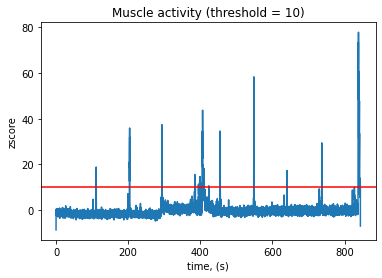

In [219]:
import matplotlib.pyplot as plt

%matplotlib inline
fig1, ax = plt.subplots()
ax.plot(data1.times, scores_muscle)
ax.axhline(y=threshold_muscle, color='r')
ax.set(xlabel='time, (s)', ylabel='zscore', title='Muscle activity (threshold = %s)' % threshold_muscle)


In [220]:
data1.set_annotations(annotations_blink+annotations_muscle)

<Raw | sub-01_ses-01_task-dur_run-01_raw_sss.fif, 341 x 844000 (844.0 s), ~2.15 GB, data loaded>

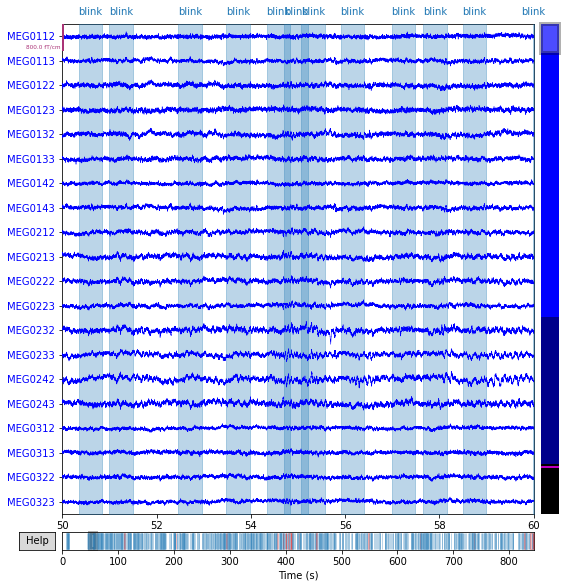

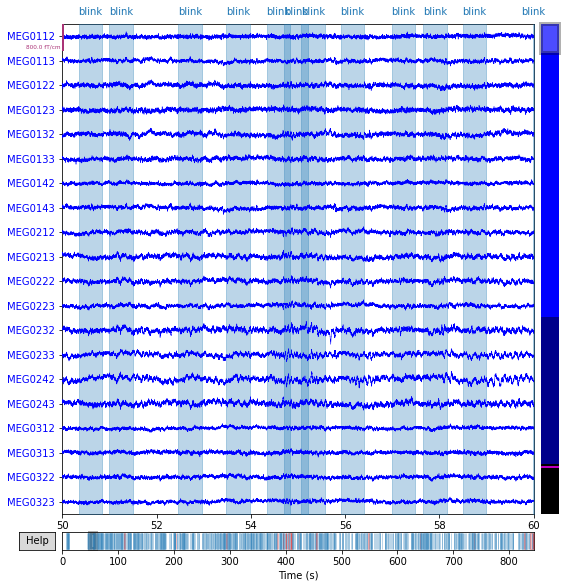

In [221]:
%matplotlib inline
data1.plot(start=50)

In [222]:
data1.info

<Info | 23 non-empty values
 acq_pars: ACQactiveGround 1 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: EOG001, EOG002, ECG003, IASX+, IASX-, IASY+, IASY-, IASZ+, ...
 chs: 2 EOG, 1 ECG, 11 Internal Active Shielding data (Triux systems), 102 Magnetometers, 204 Gradiometers, 5 misc, 15 Stimulus, 1 System status channel information (Triux systems)
 custom_ref_applied: False
 description: TRIUX system at XXX. MPG Site XNAT Anonymization script v001. ...
 dev_head_t: MEG device -> head transform
 dig: 270 items (3 Cardinal, 4 HPI, 263 Extra)
 events: 1 item (list)
 experimenter: mne_anonymize
 file_id: 4 items (dict)
 gantry_angle: 68.0
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 3 items (dict)
 line_freq: 50.0
 lowpass: 330.0 Hz
 meas_date: 2000-01-01 00:00:00 UTC
 meas_id: 4 items (dict)
 nchan: 341
 proc_history: 1 item (list)
 proj_name: mne_anonymize
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 5 items (dict)
>

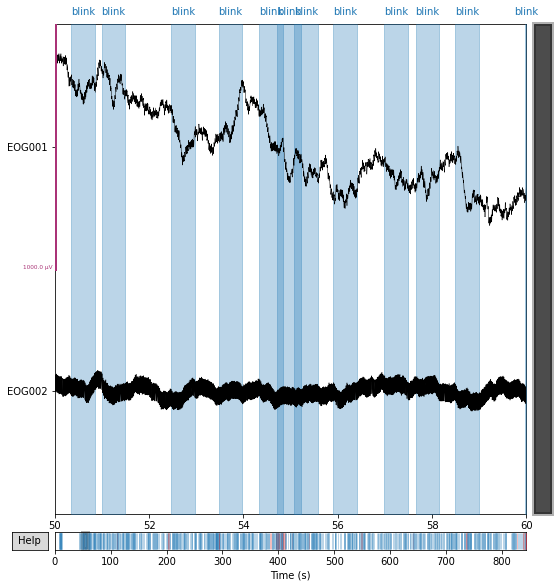

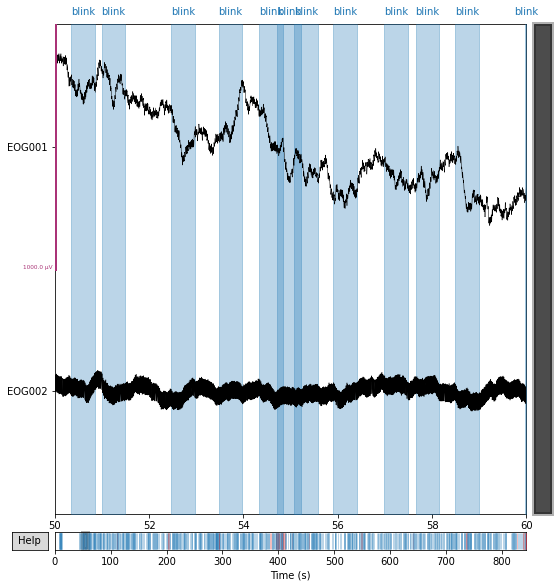

In [223]:
# Set the channel type as 'eog'
data1.set_channel_types({'EOG001': 'eog'})
data1.set_channel_types({'EOG002': 'eog'})

eog_picks = mne.pick_types(data1.info, meg=False, eog=True)

scl = dict(eog=500e-6)
data1.plot(order=eog_picks, scalings=scl, start=50)

In [227]:
data1.annotations.save('/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_ann.csv', overwrite=True)


In [228]:
#bids_path.update(run='02')
#print(bids_path.basename)

#RUN 2

data2 = mne.io.read_raw_fif('/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-02_raw_sss.fif', preload=True) 

# Blinks
eog_events = mne.preprocessing.find_eog_events(data2, ch_name='EOG001') 
n_blinks = len(eog_events)  
onset = eog_events[:, 0] / data2.info['sfreq'] - 0.25
onset -= data2._first_time  
duration = np.repeat(0.5, n_blinks)  
description = ['blink'] * n_blinks  
orig_time = data2.info['meas_date']
annotations_blink = mne.Annotations(onset, duration, description, orig_time)

# Muscle
threshold_muscle = 10
annotations_muscle, scores_muscle = annotate_muscle_zscore(
    data2, ch_type="mag", threshold=threshold_muscle, min_length_good=0.2,
    filter_freq=[110, 140])

# Annotate the data files
data2.set_annotations(annotations_blink+annotations_muscle)

# Save 
#data2.annotations.save(ann_fname_2,overwrite=True)
data2.annotations.save('/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-02_ann.csv', overwrite=True)


Opening raw data file /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-02_raw_sss.fif...
    Range : 10000 ... 892999 =     10.000 ...   892.999 secs
Ready.
Reading 0 ... 882999  =      0.000 ...   882.999 secs...
Using EOG channel: EOG001
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG001 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)

Now detecting blinks and generating corresponding even

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.1e+02 - 1.4e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 110.00
- Lower transition bandwidth: 27.50 Hz (-6 dB cutoff frequency: 96.25 Hz)
- Upper passband edge: 140.00 Hz
- Upper transition bandwidth: 35.00 Hz (-6 dB cutoff frequency: 157.50 Hz)
- Filter length: 121 samples (0.121 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 102 out of 102 | elapsed:    4.6s finished


Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1651 samples (1.651 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [229]:
#bids_path.update(run='02')
#print(bids_path.basename)

#RUN 3

data3 = mne.io.read_raw_fif('/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-03_raw_sss.fif', preload=True) 

# Blinks
eog_events = mne.preprocessing.find_eog_events(data3, ch_name='EOG001') 
n_blinks = len(eog_events)  
onset = eog_events[:, 0] / data3.info['sfreq'] - 0.25
onset -= data3._first_time  
duration = np.repeat(0.5, n_blinks)  
description = ['blink'] * n_blinks  
orig_time = data3.info['meas_date']
annotations_blink = mne.Annotations(onset, duration, description, orig_time)

# Muscle
threshold_muscle = 10
annotations_muscle, scores_muscle = annotate_muscle_zscore(
    data3, ch_type="mag", threshold=threshold_muscle, min_length_good=0.2,
    filter_freq=[110, 140])

# Annotate the data files
data3.set_annotations(annotations_blink+annotations_muscle)

# Save 
#data2.annotations.save(ann_fname_2,overwrite=True)
data3.annotations.save('/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-03_ann.csv', overwrite=True)


Opening raw data file /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-03_raw_sss.fif...
    Range : 9000 ... 825999 =      9.000 ...   825.999 secs
Ready.
Reading 0 ... 816999  =      0.000 ...   816.999 secs...
Using EOG channel: EOG001
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG001 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)

Now detecting blinks and generating corresponding event

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.1e+02 - 1.4e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 110.00
- Lower transition bandwidth: 27.50 Hz (-6 dB cutoff frequency: 96.25 Hz)
- Upper passband edge: 140.00 Hz
- Upper transition bandwidth: 35.00 Hz (-6 dB cutoff frequency: 157.50 Hz)
- Filter length: 121 samples (0.121 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 102 out of 102 | elapsed:    4.2s finished


Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1651 samples (1.651 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/tmp/ipykernel_15592/3338116458.py:25: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  data3.set_annotations(annotations_blink+annotations_muscle)


In [230]:
#bids_path.update(run='02')
#print(bids_path.basename)

#RUN 4

data4 = mne.io.read_raw_fif('/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-04_raw_sss.fif', preload=True) 

# Blinks
eog_events = mne.preprocessing.find_eog_events(data4, ch_name='EOG001') 
n_blinks = len(eog_events)  
onset = eog_events[:, 0] / data3.info['sfreq'] - 0.25
onset -= data4._first_time  
duration = np.repeat(0.5, n_blinks)  
description = ['blink'] * n_blinks  
orig_time = data4.info['meas_date']
annotations_blink = mne.Annotations(onset, duration, description, orig_time)

# Muscle
threshold_muscle = 10
annotations_muscle, scores_muscle = annotate_muscle_zscore(
    data4, ch_type="mag", threshold=threshold_muscle, min_length_good=0.2,
    filter_freq=[110, 140])

# Annotate the data files
data4.set_annotations(annotations_blink+annotations_muscle)

# Save 
#data2.annotations.save(ann_fname_2,overwrite=True)
data4.annotations.save('/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-04_ann.csv', overwrite=True)


Opening raw data file /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-04_raw_sss.fif...
    Range : 10000 ... 828999 =     10.000 ...   828.999 secs
Ready.
Reading 0 ... 818999  =      0.000 ...   818.999 secs...
Using EOG channel: EOG001
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG001 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)

Now detecting blinks and generating corresponding even

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.1e+02 - 1.4e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 110.00
- Lower transition bandwidth: 27.50 Hz (-6 dB cutoff frequency: 96.25 Hz)
- Upper passband edge: 140.00 Hz
- Upper transition bandwidth: 35.00 Hz (-6 dB cutoff frequency: 157.50 Hz)
- Filter length: 121 samples (0.121 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 102 out of 102 | elapsed:    4.2s finished


Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1651 samples (1.651 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/tmp/ipykernel_15592/1132223900.py:25: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  data4.set_annotations(annotations_blink+annotations_muscle)


In [231]:
#bids_path.update(run='02')
#print(bids_path.basename)

#RUN 5

data5 = mne.io.read_raw_fif('/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-05_raw_sss.fif', preload=True) 

# Blinks
eog_events = mne.preprocessing.find_eog_events(data5, ch_name='EOG001') 
n_blinks = len(eog_events)  
onset = eog_events[:, 0] / data3.info['sfreq'] - 0.25
onset -= data5._first_time  
duration = np.repeat(0.5, n_blinks)  
description = ['blink'] * n_blinks  
orig_time = data5.info['meas_date']
annotations_blink = mne.Annotations(onset, duration, description, orig_time)

# Muscle
threshold_muscle = 10
annotations_muscle, scores_muscle = annotate_muscle_zscore(
    data5, ch_type="mag", threshold=threshold_muscle, min_length_good=0.2,
    filter_freq=[110, 140])

# Annotate the data files
data5.set_annotations(annotations_blink+annotations_muscle)

# Save 
#data2.annotations.save(ann_fname_2,overwrite=True)
data5.annotations.save('/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-05_ann.csv', overwrite=True)


Opening raw data file /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-05_raw_sss.fif...
    Range : 37000 ... 842999 =     37.000 ...   842.999 secs
Ready.
Reading 0 ... 805999  =      0.000 ...   805.999 secs...
Using EOG channel: EOG001
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG001 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)

Now detecting blinks and generating corresponding even

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.1e+02 - 1.4e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 110.00
- Lower transition bandwidth: 27.50 Hz (-6 dB cutoff frequency: 96.25 Hz)
- Upper passband edge: 140.00 Hz
- Upper transition bandwidth: 35.00 Hz (-6 dB cutoff frequency: 157.50 Hz)
- Filter length: 121 samples (0.121 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 102 out of 102 | elapsed:    4.1s finished


Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1651 samples (1.651 s)

Overwriting existing file.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/tmp/ipykernel_15592/2867903840.py:25: RuntimeWarning: Omitted 56 annotation(s) that were outside data range.
  data5.set_annotations(annotations_blink+annotations_muscle)
/tmp/ipykernel_15592/2867903840.py:25: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data5.set_annotations(annotations_blink+annotations_muscle)


# Using ICA to reduce artefacts

This section will show how to use an independent component analysis (ICA) approach to suppress ocular and cardiac artifacts. This will be done by first performing an ICA decomposition of the data after which the components reflecting the artifacts are identified manually. As a last step the artifact components are 'projected out'.

## Preparation

Important the relevant Python modules:

In [232]:
import os.path as op
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne_bids import BIDSPath, read_raw_bids
from mne.preprocessing import ICA

### File overview
The chapter relies on the input file (embedded in the BIDS structure):
~~~
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_raw_sss.fif
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-02_raw_sss.fif
~~~
and generates the output files
~~~
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_ica.fif
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-02_ica.fif
~~~

In [235]:
for subfile in range(1, 3):
    raw = mne.io.read_raw_fif('/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_raw_sss.fif', preload=True) 

    raw_resmpl = raw.copy().pick('meg')
    raw_resmpl.resample(200) # dowsample to 200 Hz
    raw_resmpl.filter(1, 40) # band-pass filtert from 1 to 40 Hz
    if subfile == 1:
        raw_resmpl_all = mne.io.concatenate_raws([raw_resmpl])
        bids_path.update(run='02')
    else:
        raw_resmpl_all = mne.io.concatenate_raws([raw_resmpl_all, raw_resmpl])
del raw_resmpl

Opening raw data file /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_raw_sss.fif...
    Range : 9000 ... 852999 =      9.000 ...   852.999 secs
Ready.
Reading 0 ... 843999  =      0.000 ...   843.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    1.4s finished


Opening raw data file /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_raw_sss.fif...
    Range : 9000 ... 852999 =      9.000 ...   852.999 secs
Ready.
Reading 0 ... 843999  =      0.000 ...   843.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    1.3s finished


### Applying the ICA algorithm
Now we apply the ICA algorithm. We have chosen for the *fastica* approach as it is well established and widely used. However, other ICA methods are available in MNE-Python.

In [236]:
ica = ICA(method='fastica',
    random_state=97,
    n_components=30,
    verbose=True)

ica.fit(raw_resmpl_all,
    verbose=True)

Fitting ICA to data using 306 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 28.9s.


<ICA | raw data decomposition, method: fastica (fit in 65 iterations on 337600 samples), 30 ICA components (306 PCA components available), channel types: mag, grad, no sources marked for exclusion>

### Identifying the ICA components reflecting the artifacts
To plot the examples for the time-traces of the ICA components use:

Creating RawArray with float64 data, n_channels=30, n_times=337600
    Range : 1800 ... 339399 =      9.000 ...  1696.995 secs
Ready.


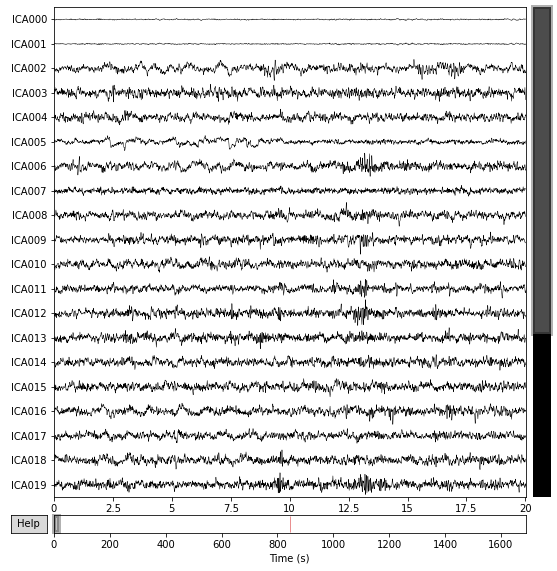

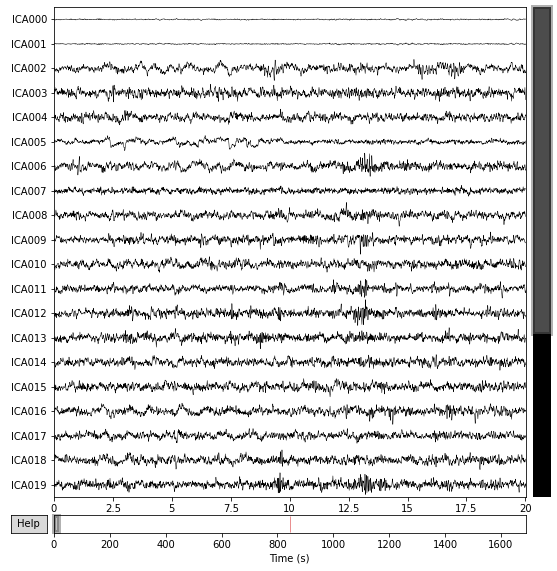

In [237]:
%matplotlib inline
ica.plot_sources(raw_resmpl_all, title='ICA')

Creating RawArray with float64 data, n_channels=30, n_times=337600
    Range : 1800 ... 339399 =      9.000 ...  1696.995 secs
Ready.


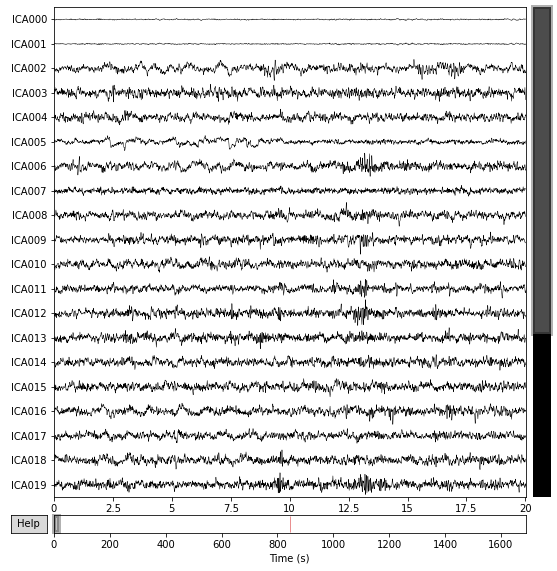

In [238]:
%matplotlib qt
ica.plot_sources(raw_resmpl_all, title='ICA')

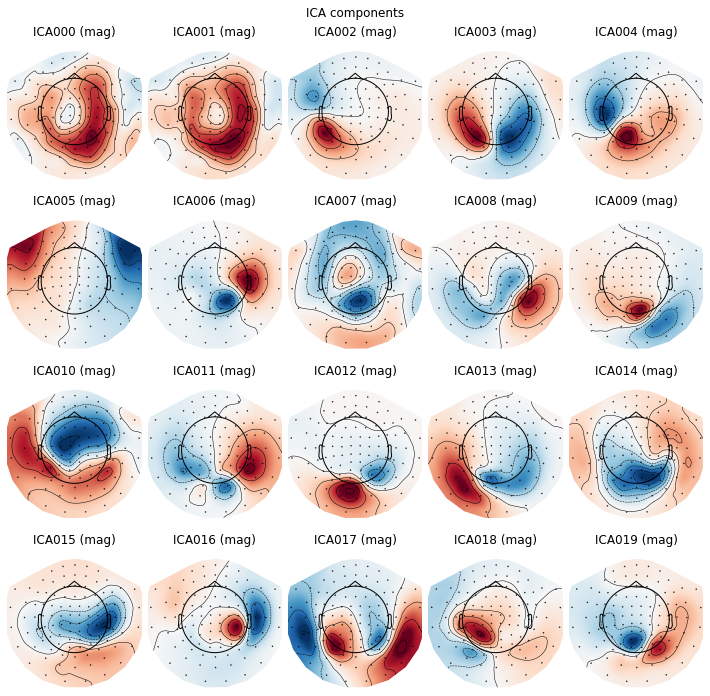

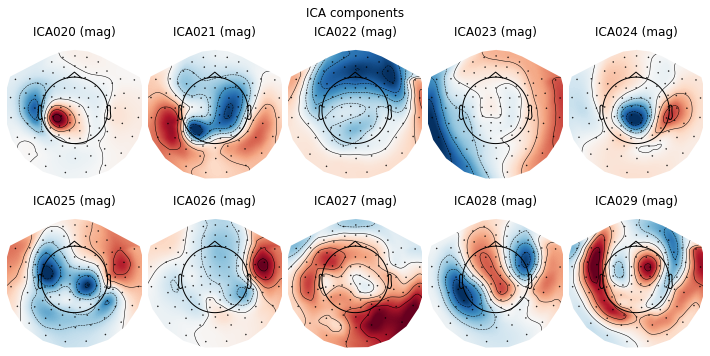

[<MNEFigure size 702x696.24 with 20 Axes>,
 <MNEFigure size 702x357.12 with 10 Axes>]

In [239]:
%matplotlib inline
ica.plot_components()

These plots show the topography associated with the magnetometers as they are more straightforward to interpret. The topography of ICA000 and ICA001 look like a classical eye-blink artifacts with strong activity over frontal left and right sensors of opposite polarity. The frontal negativity of ICA011 is associated with saccades. ICA022 looks like a typical ECG artifact as observed by the strong activity in the rim sensors stemming from the magnetic field circling the heart.

How many components should in general be removed? As a rule of thumb not more than a handful. Typically only remove components which clearly reflect a physiological artifact. Removing too many components might remove brain activity as well.

**Question 3:** Which component(s) might reflect the human alpha band activity? Base your argument both on the traces and topographies.


### Attenuating  the artifacts by applying the projections
Now that we have detected the ICA components associated with ocular and cardiac artifacts, we have to 'project out' them. This will be done by applying the ICA projections generated by *ica.exclude* to the original raw data which will be loaded again by looping over the sub-files. After the ICA projections have been applied (*ica.apply*) the data will be saved.


In [249]:
# Set the 4 components to exclude
#ica.exclude = [0, 1, 11, 22]

# Loop over the subfiles
#for subfile in range(1, 3):
 #   if subfile == 2:
  #      bids_path.update(run='02')

   # raw_ica = read_raw_bids(bids_path=bids_path,
         #            extra_params={'preload':True},
         #            verbose=True)
    #ica.apply(raw_ica)

    #raw_ica.save(deriv_files[subfile-1], overwrite=True)
from mne_bids import BIDSPath
from mne.io import read_raw_fif

# Set the 4 components to exclude
ica.exclude = [0, 1, 11, 22]

# Define the paths for runs 1 and 2
run_paths = [
    "/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_raw_sss.fif",
    "/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-02_raw_sss.fif"
]

# Loop over the runs
for run_idx, run_path in enumerate(run_paths, start=1):
    # Read the raw data
    raw_ica= read_raw_fif(run_path, preload=True)

    # Apply ICA
    ica.apply(raw)

    # Save the processed data
    output_path = f"/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-0{run_idx}_ica.fif"
    raw_ica.save(output_path, overwrite=True)


Opening raw data file /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_raw_sss.fif...
    Range : 9000 ... 852999 =      9.000 ...   852.999 secs
Ready.
Reading 0 ... 843999  =      0.000 ...   843.999 secs...
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 4 ICA components
    Projecting back using 306 PCA components
Overwriting existing file.
Writing /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_ica.fif


/tmp/ipykernel_15592/252595376.py:37: RuntimeWarning: This filename (/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_ica.save(output_path, overwrite=True)


Closing /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_ica.fif
[done]
Opening raw data file /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-02_raw_sss.fif...
    Range : 10000 ... 892999 =     10.000 ...   892.999 secs
Ready.
Reading 0 ... 882999  =      0.000 ...   882.999 secs...
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 4 ICA components
    Projecting back using 306 PCA components
Overwriting existing file.
Writing /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-02_ica.fif


/tmp/ipykernel_15592/252595376.py:37: RuntimeWarning: This filename (/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-02_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_ica.save(output_path, overwrite=True)


Closing /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-02_ica.fif
[done]


## Plotting the data to check the artifact reduction

We will here examine some of the traces from one of the subfiles (#1) to demonstrate the artifact reduction.

Define a few frontal magnetometers to examine and include the EOG sensors:

In [250]:
chs = ['MEG0311', 'MEG0121', 'MEG1211', 'MEG1411']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]

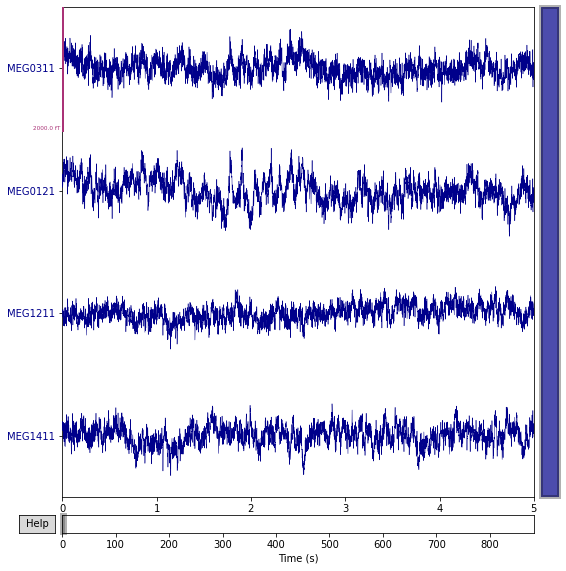

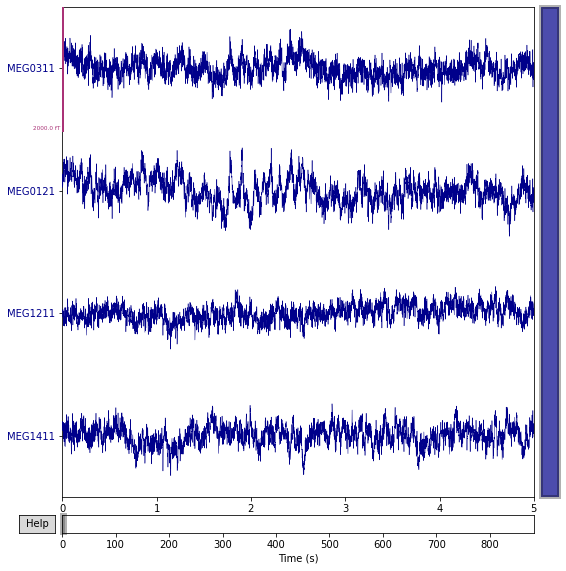

In [251]:
%matplotlib inline
raw.plot(order=chan_idxs, duration=5)


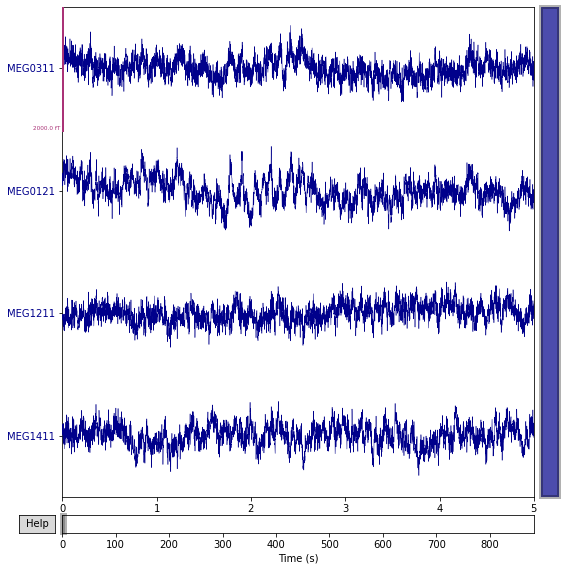

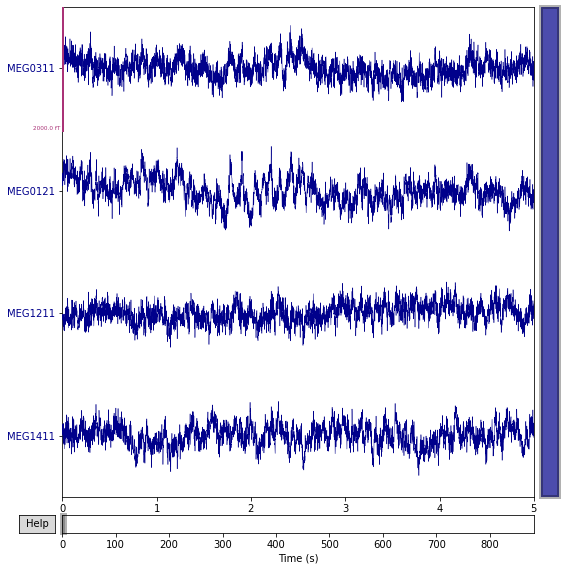

In [252]:
%matplotlib inline
raw_ica.plot(order=chan_idxs, duration=5)

# Extracting condition-specific trials

The aim of this section 
is to extract the trials according to the trigger channel. We will explain how the events can be generated from the stimulus channels and how to extract condition specific trials (epochs). Once the trials are extracted, bad epochs will be identified and excluded on based on their peak-to-peak signal amplitude.

## Preparation

Import the relevant Python modules:

In [253]:
import os.path as op
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne_bids import BIDSPath, read_raw_bids

### File overview
The chapter relies on the input file (embedded in the BIDS structure):
~~~
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_ica.fif
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-02_ica.fif

<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_ann.csv
<BIDS_ROOT>/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-02_ann.csv
~~~
and generates the output files
~~~
<BIDS_ROOT>/derivatives/Analysis/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-12_epo.fif
~~~

In [278]:
import os.path as op

subject = '01'
session = '01'
task = 'dur'
run = '01'
meg_suffix = 'meg'
ica_suffix = 'ica'
ann_suffix = 'ann'
epo_suffix = 'epo'


#preproc_root = r'C:\Users\parkh\MEG Dropbox\Hyojin Park\FLUX\derivatives\Preprocessing'
#deriv_root = r'C:\Users\parkh\MEG Dropbox\Hyojin Park\FLUX\derivatives\Analysis'

preproc_root = 'home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing'
deriv_root =   'home/sanjeev/Desktop/BIO/MEG/derivatives/Analysis'

bids_path_preproc = BIDSPath(subject=subject, session=session,
            task=task, run=run, suffix=ica_suffix, datatype='meg',
            root=preproc_root, extension='.fif', check=False)

bids_path = BIDSPath(subject=subject, session=session,
            task=task, run=run, suffix=epo_suffix, datatype='meg',
            root=deriv_root, extension='.fif', check=False).mkdir()

ann_fname = bids_path_preproc.basename.replace(ica_suffix, ann_suffix) # output filename
ann_fname = ann_fname.replace('fif', 'csv') # output filename

ann_fname_1 = op.join(bids_path_preproc.directory, ann_fname)
ann_fname_2 = ann_fname_1.replace('run-01', 'run-02')


#print(bids_path_preproc.basename, bids_path_preproc.fpath)
#print(bids_path.basename, bids_path.fpath)

deriv_file = bids_path.basename.replace('run-01', 'run-12')  # run 12 -> run 01 concatenated with run 02
deriv_fname = op.join(bids_path.directory, deriv_file)

print(ann_fname_1)

home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_ann.csv


## Reading the events from the stimulus channels
First read all the events from the stimulus channel (in our case, STI01). We will loop over the 2 fif-files created in the previous step.

In [313]:
# This section only runs on run=01 for illustration purpose 
#bids_path_preproc.update(run='01')


raw = mne.io.read_raw_fif('/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_ica.fif')                


Opening raw data file /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_ica.fif...
    Range : 9000 ... 852999 =      9.000 ...   852.999 secs
Ready.


/tmp/ipykernel_15592/3983549627.py:5: RuntimeWarning: This filename (/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif('/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_ica.fif')


In [4]:
import mne

dataset = '/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_ica.fif'
#'/home/sanjeev/Desktop/BIO/MEG/sub-CA103/ses-1/meg/sub-CA103_ses-1_task-dur_run-01_meg.fif'

# Preprocessing
raw = mne.io.read_raw_fif(dataset, preload=True)
#raw.filter(l_freq=2, h_freq=100, fir_design='firwin')
#raw.notch_filter(freqs=50)

# Step 12: Read events
#events = mne.find_events(raw)
events = mne.find_events(raw, min_duration=0.01)
# Step 13: Display event types
event_types = set(events[:, 2])
print("Event Types:", event_types)

# Step 14: Define trials
#event_id = {'left': 102, 'right': 103}
event_id = {'task relevant target': 201, 'task relevant non target': 202, 'task irrelevant': 203} 
tmin = -2  # seconds
tmax = 2  # seconds
baseline = None
picks = mne.pick_types(raw.info, meg=True)
reject = None  # You can set rejection parameters here if needed
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=baseline, preload=True, picks=picks, reject=reject)

# If you want to filter epochs
epochs.filter(l_freq=2, h_freq=100, fir_design='firwin')

# You can then access the data using epochs.get_data()


Opening raw data file /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_ica.fif...
    Range : 9000 ... 852999 =      9.000 ...   852.999 secs
Ready.
Reading 0 ... 843999  =      0.000 ...   843.999 secs...


/tmp/ipykernel_49898/523108172.py:7: RuntimeWarning: This filename (/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(dataset, preload=True)


809 events found on stim channel STI101
Event IDs: [   2    3    4    6    7    8    9   10   11   12   14   15   16   17
   18   19   21   22   23   24   27   28   29   30   31   32   33   34
   35   36   37   38   40   42   43   44   45   46   49   50   51   52
   53   54   55   56   57   60   61   62   64   65   66   67   68   69
   70   71   72   73   74   75   77   78   79   80   96   97  101  102
  103  151  152  153  163  164  165  168  201  202  203 5888 5984 6143]
Event Types: {2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 42, 43, 44, 45, 46, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 96, 97, 101, 102, 103, 151, 152, 153, 163, 164, 165, 168, 201, 202, 203, 5888, 5984, 6143}
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 95 events and 4001 o

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 29070 out of 29070 | elapsed:   10.9s finished


<Epochs |  95 events (all good), -2 – 2 s, baseline off, ~892.6 MB, data loaded,
 'task relevant target': 10
 'task relevant non target': 41
 'task irrelevant': 44>

In [5]:
raw

<Raw | sub-01_ses-01_task-dur_run-01_ica.fif, 341 x 844000 (844.0 s), ~2.15 GB, data loaded>

In [8]:
event_id = {'task relevant target': 201, 'task relevant non target': 202, 'task irrelevant': 203}

In [9]:
# Reading the events from the  raw file
events, events_id = mne.events_from_annotations(raw, event_id)

In [10]:
events_id

{'task relevant target': 201,
 'task relevant non target': 202,
 'task irrelevant': 203}

In [12]:
import mne
ann_fname_1 = '/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_ann.csv'
ann1 = mne.read_annotations(ann_fname_1)
print(ann1)
raw.set_annotations(ann1)


<Annotations | 595 segments: BAD_muscle (25), blink (570)>


<Raw | sub-01_ses-01_task-dur_run-01_ica.fif, 341 x 844000 (844.0 s), ~2.15 GB, data loaded>

In [319]:
#ann1 = mne.read_annotations(ann_fname_1)
#print(ann1)
#raw.set_annotations(ann1)

Using matplotlib as 2D backend.


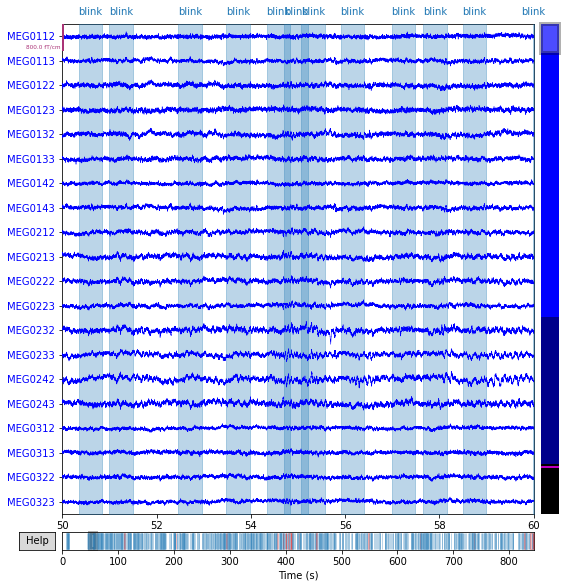

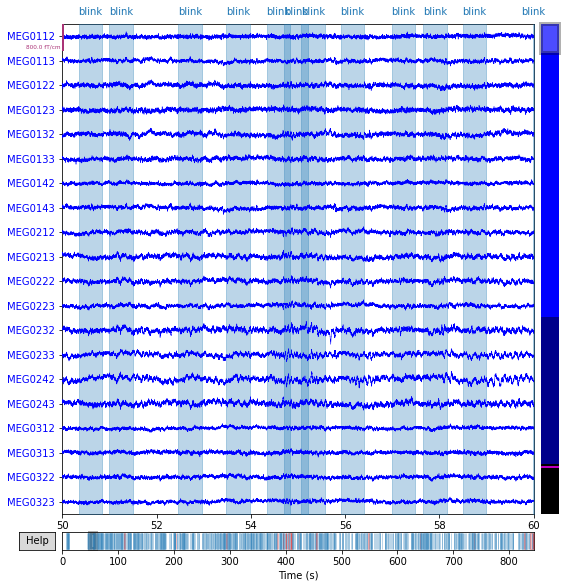

In [13]:
%matplotlib inline
raw.plot(start=50)

In [16]:
#import matplotlib.pyplot as plt
#%matplotlib inline
#plt.stem(events[:,0][:80], events[:,2][:80])
#plt.xlabel('samples')
#plt.ylabel('Trigger value (STI101)')
#plt.show()

In [17]:
#bids_path_preproc

In [22]:
#raw_list = list()
#events_list = list()

#for subfile in range(1, 3):
 #   print(subfile)
   # if subfile == 1:
    #    bids_path_preproc.update(run='01')
     #   ann = mne.read_annotations(ann_fname_1)
     
   # if subfile == 2:
     #   bids_path_preproc.update(run='02')
     #   ann = mne.read_annotations(ann_fname_2)
    
    #raw = read_raw_bids(bids_path=bids_path_preproc, 
        #    extra_params={'preload':True},
        #    verbose=True)
    
   # events, events_id = mne.events_from_annotations(raw, event_id='auto')
    #raw.set_annotations(ann)
                    
   # raw_list.append(raw)
    #events_list.append(events)
    
# define event ids we are interested in
#events_picks_id = {k:v for k, v in events_id.items() if k.startswith('blink')} 
#import mne

# Initialize empty lists to store raw data and events
raw_list = []
events_list = []

# Loop over the subfiles
for subfile in range(1, 3):
    print(subfile)
    if subfile == 1:
        raw_fname = '/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_ica.fif'
        ann_fname = '/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_ann.csv'
    elif subfile == 2:
        raw_fname = '/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-02_ica.fif'
        ann_fname = '/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-02_ann.csv'

    # Read raw data
    raw = mne.io.read_raw_fif(raw_fname, preload=True, verbose=True)
    
    # Read annotations
    ann = mne.read_annotations(ann_fname)
    
    # Extract events from annotations
    event_id = {'task relevant target': 201, 'task relevant non target': 202, 'task irrelevant': 203}
    events, events_id = mne.events_from_annotations(raw, event_id)
    
    # Set annotations for raw data
    raw.set_annotations(ann)
    
    # Append raw data and events to lists
    raw_list.append(raw)
    events_list.append(events)
    
# Define event ids we are interested in
events_picks_id = {k:v for k, v in events_id.items() if k.startswith('task relevant target')}


1
Opening raw data file /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_ica.fif...
    Range : 9000 ... 852999 =      9.000 ...   852.999 secs
Ready.
Reading 0 ... 843999  =      0.000 ...   843.999 secs...


/tmp/ipykernel_49898/505832763.py:43: RuntimeWarning: This filename (/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-01_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_fname, preload=True, verbose=True)


2
Opening raw data file /home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-02_ica.fif...
    Range : 10000 ... 892999 =     10.000 ...   892.999 secs
Ready.
Reading 0 ... 882999  =      0.000 ...   882.999 secs...


/tmp/ipykernel_49898/505832763.py:43: RuntimeWarning: This filename (/home/sanjeev/Desktop/BIO/MEG/derivatives/Preprocessing/sub-01/ses-01/meg/sub-01_ses-01_task-dur_run-02_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_fname, preload=True, verbose=True)


In [23]:
raw_list

[<Raw | sub-01_ses-01_task-dur_run-01_ica.fif, 341 x 844000 (844.0 s), ~2.15 GB, data loaded>,
 <Raw | sub-01_ses-01_task-dur_run-02_ica.fif, 341 x 883000 (883.0 s), ~2.25 GB, data loaded>]

In [24]:
events_list

[array([], shape=(0, 3), dtype=int64), array([], shape=(0, 3), dtype=int64)]

In [25]:
raw, events = mne.concatenate_raws(raw_list, events_list=events_list)
del raw_list 

ValueError: raws[1].info['dev_head_t'] differs. The instances probably come from different runs, and are therefore associated with different head positions. Manually change info['dev_head_t'] to avoid this message but beware that this means the MEG sensors will not be properly spatially aligned. See mne.preprocessing.maxwell_filter to realign the runs to a common head position.